<a href="https://colab.research.google.com/github/oskargirardin/CRP_GDPR_datasets/blob/master/single_table_synthetic_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we generate fake data using CTGAN. I'm using material from https://www.youtube.com/watch?v=Ei0klF38CNs.



CTGAN (Conditional Generative Adversarial Network) is a generative adversarial network (GAN) that generates synthetic data samples that are conditioned on real-world attributes, such as demographic characteristics or environmental conditions. CTGAN is a Python library that can be used to generate synthetic datasets that can be used to perform machine learning experiments, or for other applications where data privacy is a concern.

Table Evaluator is a Python library that provides utility functions for evaluating the quality of synthetic data generated by data generators such as CTGAN. The library provides functions for calculating metrics like mean squared error, mean absolute error, and others, between the synthetic and real data, which can be used to assess the quality and realism of the synthetic data.

# Installs + gathering


# Imports + data


In [8]:
!pip install ctgan
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of table-evaluator to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [24]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 39.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the



# Training

In [9]:
from ctgan import CTGAN


In [13]:
!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ


Downloading...
From: https://drive.google.com/uc?id=1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 31.8MB/s]


In [14]:
from table_evaluator import TableEvaluator


In [12]:
import pandas as pd
data=pd.read_csv('./insurance.csv')
     

In [15]:
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
categorical_features=['age','sex','children','smoker','region']


In [17]:

ctgan = CTGAN(verbose=True)

ctgan.fit(data, categorical_features, epochs=200)

Epoch 1, Loss G:  1.8160,Loss D: -0.0074
Epoch 2, Loss G:  1.6072,Loss D:  0.0018
Epoch 3, Loss G:  1.6785,Loss D:  0.0007
Epoch 4, Loss G:  1.6508,Loss D:  0.0016
Epoch 5, Loss G:  1.5632,Loss D: -0.0188
Epoch 6, Loss G:  1.6851,Loss D: -0.0087
Epoch 7, Loss G:  1.5694,Loss D:  0.0239
Epoch 8, Loss G:  1.4559,Loss D: -0.0061
Epoch 9, Loss G:  1.4858,Loss D:  0.0017
Epoch 10, Loss G:  1.3645,Loss D:  0.0088
Epoch 11, Loss G:  1.3884,Loss D: -0.0228
Epoch 12, Loss G:  1.4177,Loss D: -0.0514
Epoch 13, Loss G:  1.3378,Loss D:  0.0147
Epoch 14, Loss G:  1.2340,Loss D:  0.0855
Epoch 15, Loss G:  1.3178,Loss D:  0.0512
Epoch 16, Loss G:  1.2851,Loss D:  0.0579
Epoch 17, Loss G:  1.3012,Loss D:  0.1121
Epoch 18, Loss G:  1.1548,Loss D: -0.0195
Epoch 19, Loss G:  1.3076,Loss D: -0.0407
Epoch 20, Loss G:  1.2601,Loss D:  0.0199
Epoch 21, Loss G:  1.3067,Loss D: -0.0424
Epoch 22, Loss G:  1.2951,Loss D:  0.0138
Epoch 23, Loss G:  1.2953,Loss D: -0.0546
Epoch 24, Loss G:  1.2622,Loss D: -0.1017
E

# Synthetic data generation

In [18]:
samples = ctgan.sample(1000)


In [19]:
samples


,age,sex,bmi,children,smoker,region,charges
0,27,male,20.273596,0,no,northwest,10656.490145
1,39,male,24.198045,0,no,northwest,9016.554367
2,28,male,26.728061,0,no,northeast,10838.030831
3,33,male,18.519748,4,no,southeast,9161.166571
4,25,male,25.840762,0,yes,southwest,45058.114660
...,...,...,...,...,...,...,...
995,37,female,25.493715,2,no,northwest,62820.911692
996,19,male,16.747477,0,no,southwest,53968.519733
997,48,male,46.781726,0,no,southeast,64360.957323
998,53,male,31.019911,1,no,southwest,10128.871321


The generator and discriminator are trained at the same time in a competition: the generator generates examples, the discriminator tries to tell whether each example is real or fake, and the generator tries to produce examples that can fool the discriminator. This process continues back and forth, with the generator and discriminator both getting better at their respective tasks until the generator produces examples that are indistinguishable from the real examples.

Demystifying the CTGAN loss function (source=https://github.com/sdv-dev/SDV/discussions/980):

Why do we have negative generator losses, is that a problem? It's not a problem, it's a good thing, if it is negative it means that the discriminator assigns a high score to synthetic data, aka the synthetic data fools the discriminator
How do we know we trained enough/we don't overfit? When CTGANs perform well, both the generator and discriminator will plateau.

# Evaluating with TableEvaluator

In [20]:
print(data.shape, samples.shape)


(1338, 7) (1000, 7)


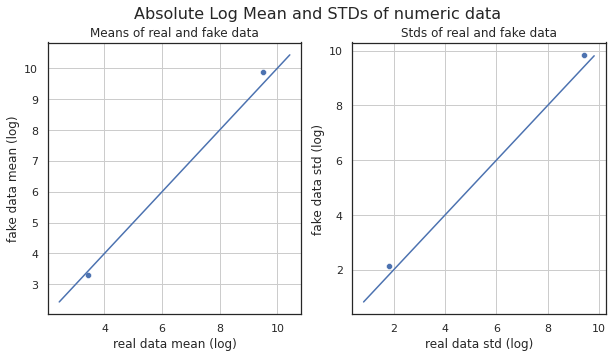

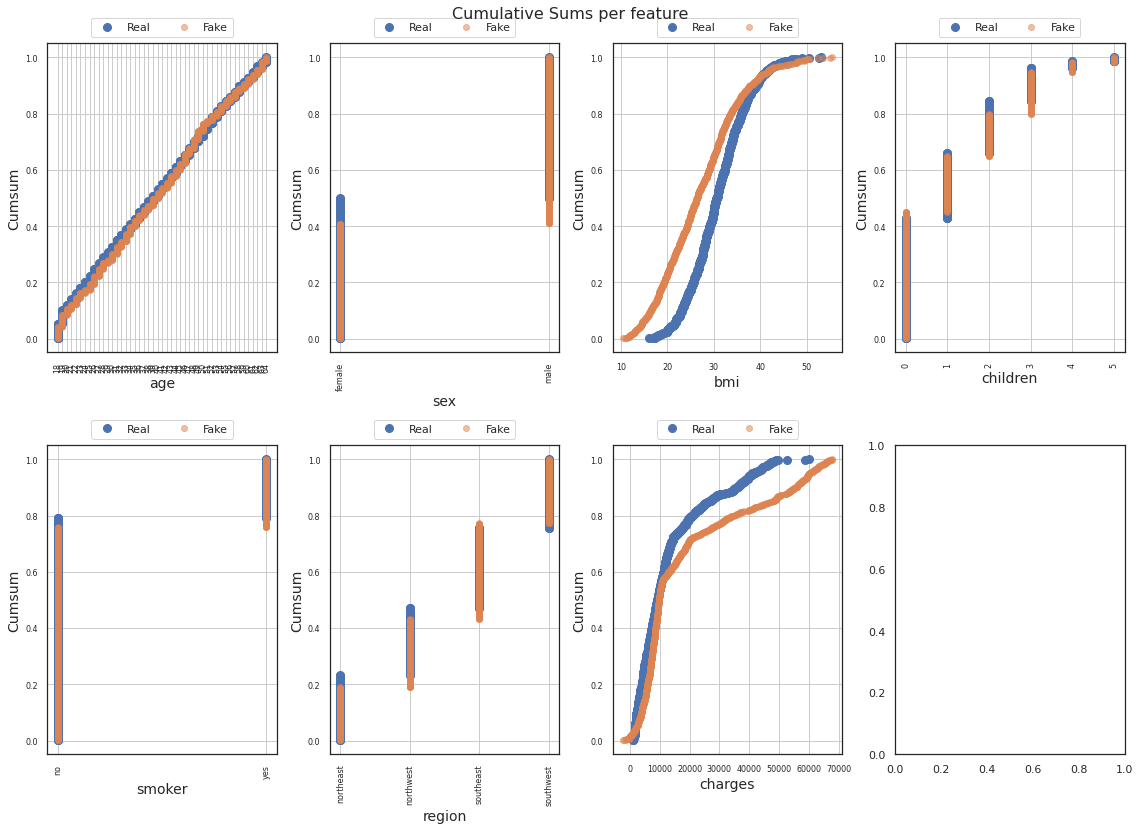

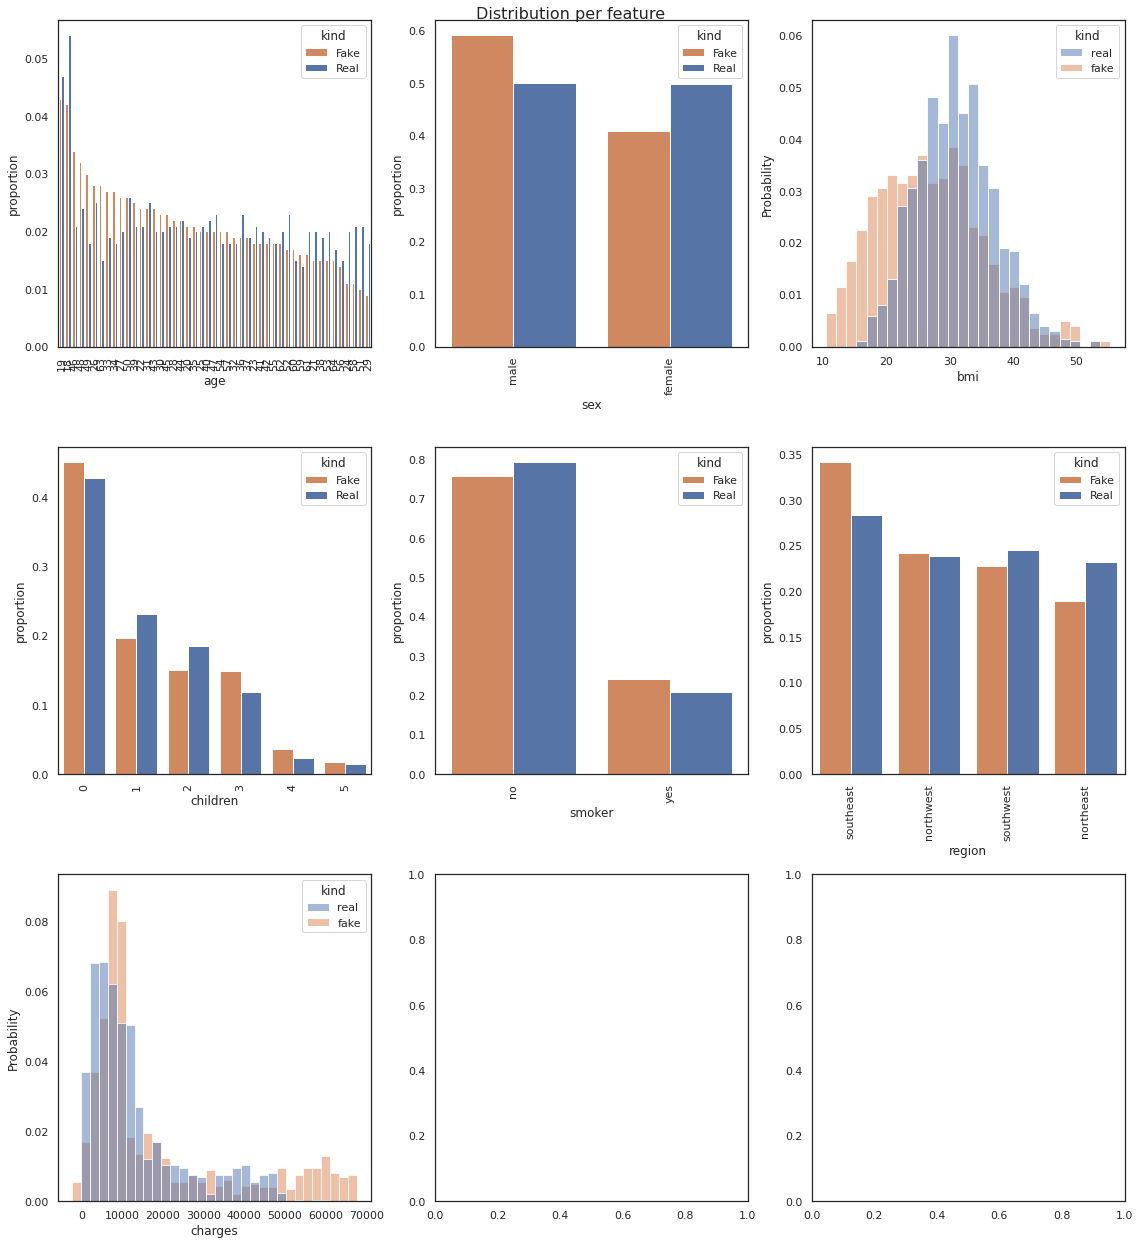

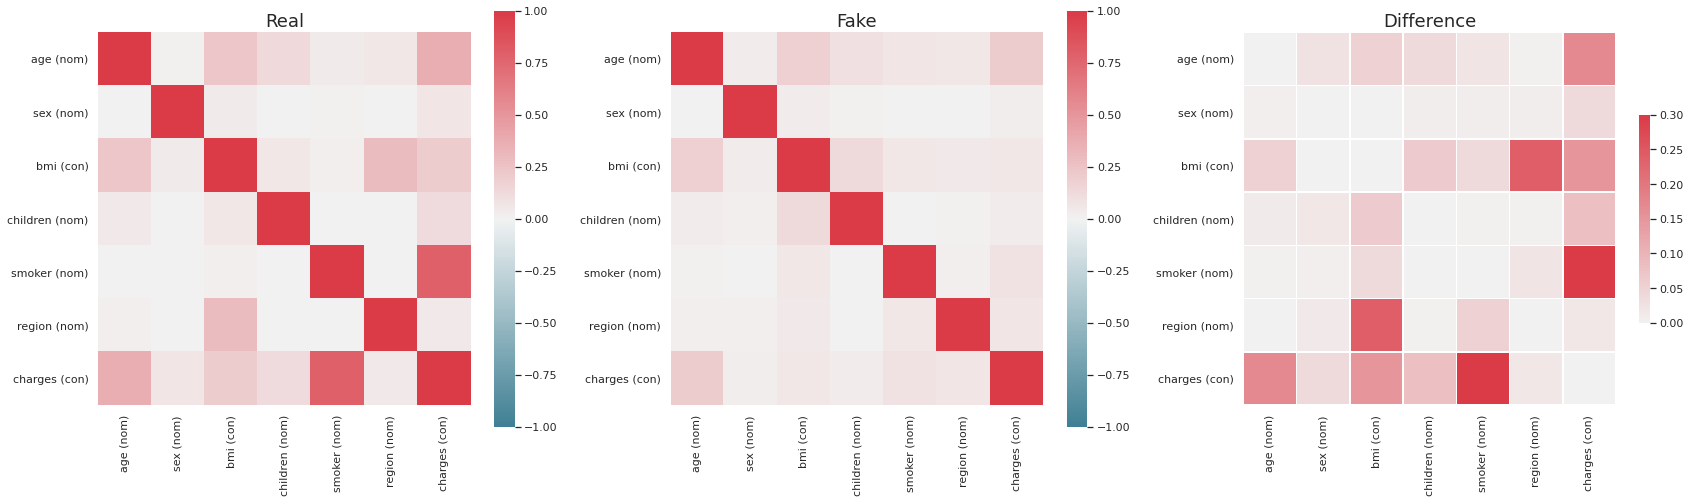

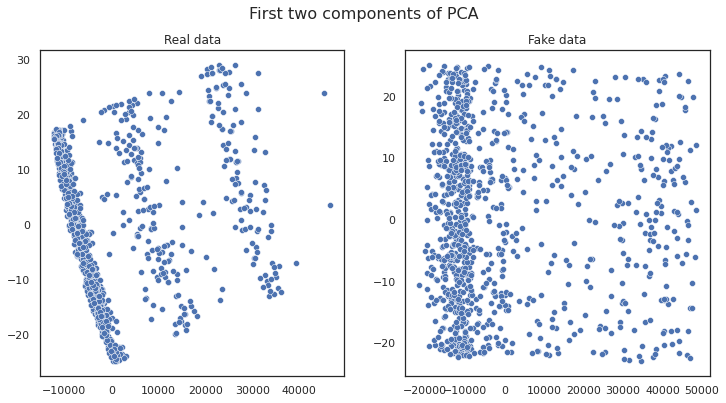

In [25]:
table_evaluator=TableEvaluator(data, samples, cat_cols=categorical_features)

table_evaluator.visual_evaluation()